In [1]:
import pandas as pd # pandas dataframe
import numpy as np # numeric python for array calculation
from matplotlib import pyplot as plt # to visulaze the result

import warnings as wr
wr.filterwarnings('ignore')

Some basic analysis to observe the data as it is very important before implementing the machine  leraning algorithm. based on this we need think which algorithom is best for predictions.

In [2]:
df = pd.read_csv('Height-Weight Data.csv') # read the csv as a pandas datafarme

In [3]:
df.head() # to see first five rows

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape # attribute #to see shape of dataframe, 3501 rows and 2 coulmns

(3501, 2)

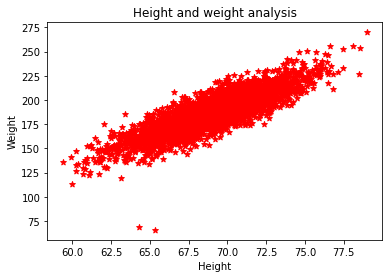

In [5]:
# let's plot the data in a scatter plot 

plt.scatter (df.Height, df.Weight, color='red', marker="*")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height and weight analysis")

plt.show()

In [6]:
# seprate the varibale or coulmn to get mean the of height(independet) and weight(dependent)
x = df.drop("Weight", axis=1) # we are droping the weight and specify the axis=1 for get column of height
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [7]:
# we can also use dataframe concept to seperate the varible using [[]]
y = df[["Weight"]]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [8]:
# find mean of height and weight as we know that for linear regerassion the best fit line will go thorogh the mean
x.mean()


Height    69.024411
dtype: float64

In [9]:
y.mean()

Weight    186.891258
dtype: float64

Linear Regression

In [10]:
#separete varible as traing and testing data set.I will keep 25% data for testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=0)


In [11]:
xtrain.head()

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [23]:
ytrain.head()

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [12]:
# create a model object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# fit the traning data to the model
lr.fit(xtrain, ytrain)

LinearRegression()

In [13]:
# our model is ready for prediction
# check the model manually

m = lr.coef_
c = lr.intercept_
y_predict = m*73.847017 + c
y_predict


array([[215.59386349]])

In [14]:
# or we can call the model as it alreday done the calculation for us, interesting 
lr.predict([[73.847017]])
# both are same hahaha!!!

array([[215.59386349]])

In [15]:
# let's calculate the predicted weight

df["predicted weight"] = lr.predict(x)
df.head()

,Height,Weight,predicted weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


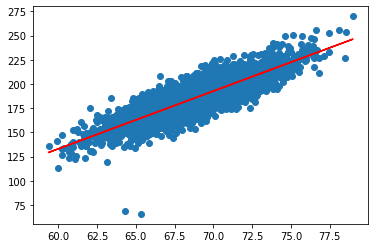

In [16]:
# let's plot with all data 
plt.plot(x,  df["predicted weight"], color='red')
#plt.scatter(x,  df["predicted weight"])
plt.scatter(x, df[['Weight']])

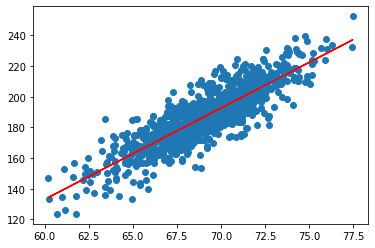

In [17]:
# lets plot with test data
plt.plot(xtest,lr.predict(xtest), color='red')
#plt.scatter(xtest,lr.predict(xtest))
plt.scatter(xtest, ytest)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, lr.predict(xtest))
mae =  mean_absolute_error(ytest, lr.predict(xtest)) 

In [19]:
mse

103.70875574105973

In [20]:
# mae

In [21]:
lr.score(xtest, ytest)

0.7400625947962998